# Data Mining Project - Predicting Future Sales Pattern

In [1]:
#import necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


%matplotlib inline 

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

### Load the data set

In [2]:
#load the dataset from UCI Repository 

link = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
data = pd.read_excel(link)
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


### Create a Smaller Dataset 

#### Since there are many entries in this dataset, as we can see from the information above, we will choose 10000 entries for our project. We will also set a random state parameter to ensure that the same 10000 data entries are chosen while working on this project. 

In [3]:
#select a sample of 10,000 entries 

sample_data = data.sample(n=10000, random_state = 1) 

sample_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
94801,C544414,22960,JAM MAKING SET WITH JARS,-2,2011-02-18 14:54:00,3.75,13408.0,United Kingdom
210111,555276,48111,DOORMAT 3 SMILEY CATS,1,2011-06-01 17:28:00,15.79,NaN,United Kingdom
455946,575656,22952,60 CAKE CASES VINTAGE CHRISTMAS,48,2011-11-10 14:29:00,0.55,13319.0,United Kingdom
403542,571636,20674,GREEN POLKADOT BOWL,16,2011-10-18 11:41:00,1.25,13509.0,United Kingdom
471951,576657,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-11-16 11:03:00,1.65,12720.0,Germany


In [4]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 94801 to 519101
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    10000 non-null  object        
 1   StockCode    10000 non-null  object        
 2   Description  9974 non-null   object        
 3   Quantity     10000 non-null  int64         
 4   InvoiceDate  10000 non-null  datetime64[ns]
 5   UnitPrice    10000 non-null  float64       
 6   CustomerID   7437 non-null   float64       
 7   Country      10000 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 703.1+ KB


### Data Cleaning and Data Preprocessing

As we do see some null values in the columns above, we will drop the rows containing the NA values. 

We will then drop any negative quantities or zero quantities and zero unit prices 


In [5]:
#Data Cleaning
#drop rows with na value 

sample_data.dropna(inplace=True)

#remove zeroes and negative values for Quantity and zero values for unitprice 

sample_data = sample_data[(sample_data['UnitPrice'] > 0)]
sample_data = sample_data[(sample_data['Quantity'] > 0)]

#Though redundant, we will convert InvoiceDate to datetime to ensure consistency and ensure clean dataset

sample_data['InvoiceDate'] = pd.to_datetime(sample_data['InvoiceDate'])

# Summary of basic statistical details
print(sample_data.describe())

# Display cleaned data information
print(sample_data.info())

          Quantity                    InvoiceDate    UnitPrice    CustomerID
count  7268.000000                           7268  7268.000000   7268.000000
mean     12.545542  2011-07-10 09:01:25.368739328     3.231431  15296.812190
min       1.000000            2010-12-01 08:34:00     0.040000  12347.000000
25%       2.000000            2011-04-06 05:38:30     1.250000  13949.000000
50%       5.000000            2011-07-29 11:07:00     1.950000  15147.000000
75%      12.000000            2011-10-20 12:08:00     3.750000  16812.250000
max    2000.000000            2011-12-09 12:50:00  2053.070000  18283.000000
std      45.674180                            NaN    24.694082   1721.054196
<class 'pandas.core.frame.DataFrame'>
Index: 7268 entries, 455946 to 519101
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    7268 non-null   object        
 1   StockCode    7268 non-null   object        
 2 

In [6]:
print(sample_data.head())

       InvoiceNo StockCode                      Description  Quantity  \
455946    575656     22952  60 CAKE CASES VINTAGE CHRISTMAS        48   
403542    571636     20674              GREEN POLKADOT BOWL        16   
471951    576657     22556   PLASTERS IN TIN CIRCUS PARADE         12   
380570    569823     23298                   SPOTTY BUNTING         1   
447064    574943    17091J           VANILLA INCENSE IN TIN        36   

               InvoiceDate  UnitPrice  CustomerID         Country  
455946 2011-11-10 14:29:00       0.55     13319.0  United Kingdom  
403542 2011-10-18 11:41:00       1.25     13509.0  United Kingdom  
471951 2011-11-16 11:03:00       1.65     12720.0         Germany  
380570 2011-10-06 12:15:00       4.95     16895.0  United Kingdom  
447064 2011-11-08 07:52:00       0.38     13026.0  United Kingdom  


### Exploratory Data Analysis

To understand our data, we will need to visualize the distribution of data so that we are able to identify key markets, and understand temporal trends and gain any other significant insights. 

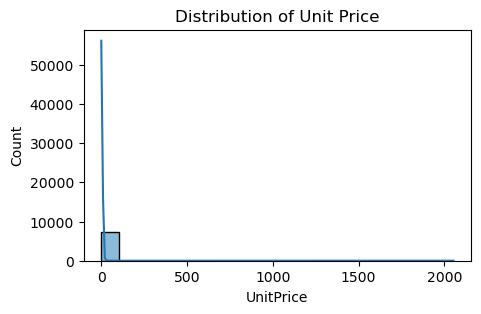

In [7]:
#Step 1: Distribution of Unit Price 

plt.figure(figsize= (5,3))
sns.histplot(sample_data['UnitPrice'], bins = 20, kde = True)
plt.title('Distribution of Unit Price')
plt.show()

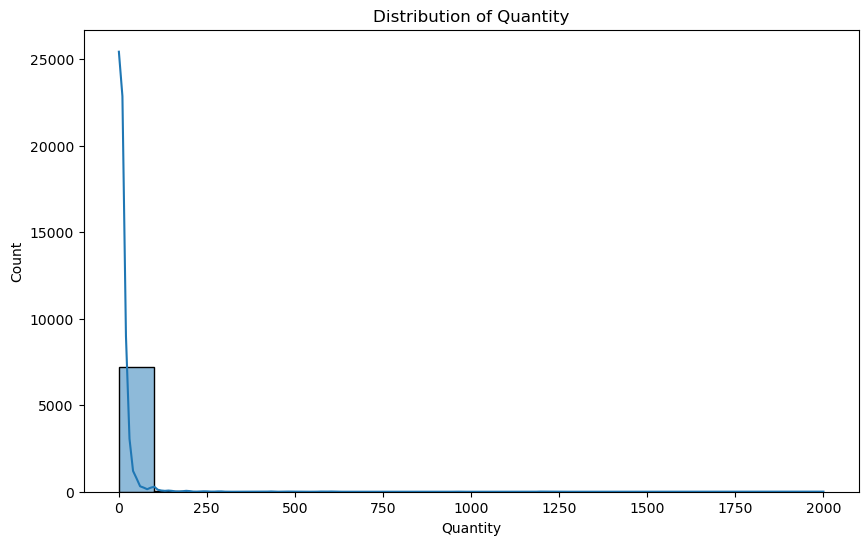

In [8]:
#Distribution of Quantity 

plt.figure(figsize = (10,6))
sns.histplot(sample_data['Quantity'], bins = 20, kde = True)
plt.title('Distribution of Quantity')
plt.show()


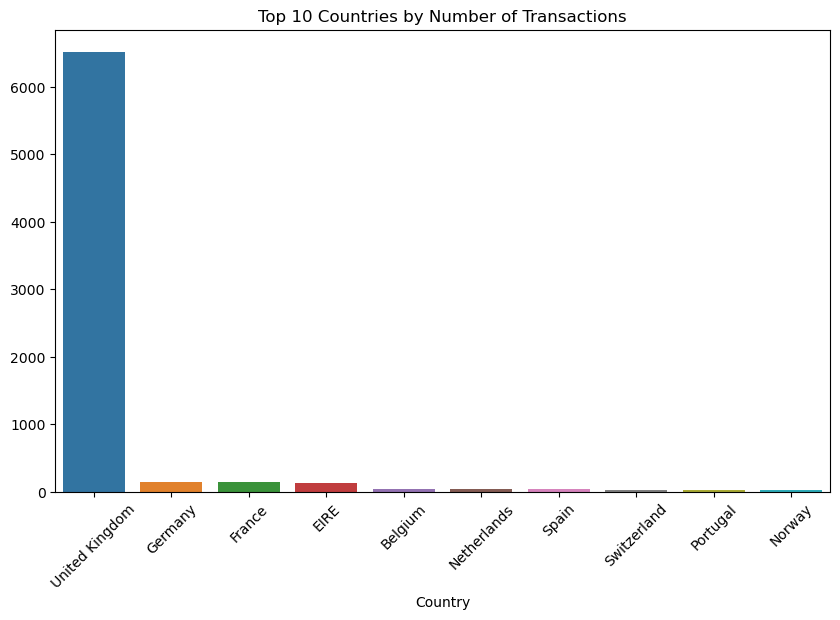

In [9]:
# top 10 countries by the number of transactions 
top_countries = sample_data['Country'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 10 Countries by Number of Transactions')
plt.xticks(rotation=45)
plt.show()

### Removing Outliers

Since the data is skewed, the visualizations are difficult to understand and it is not providing insightful information. So, below I have removed outliers for unit price and quantity. As for the country column, I have used a y-scale to have a more insightful visual. 

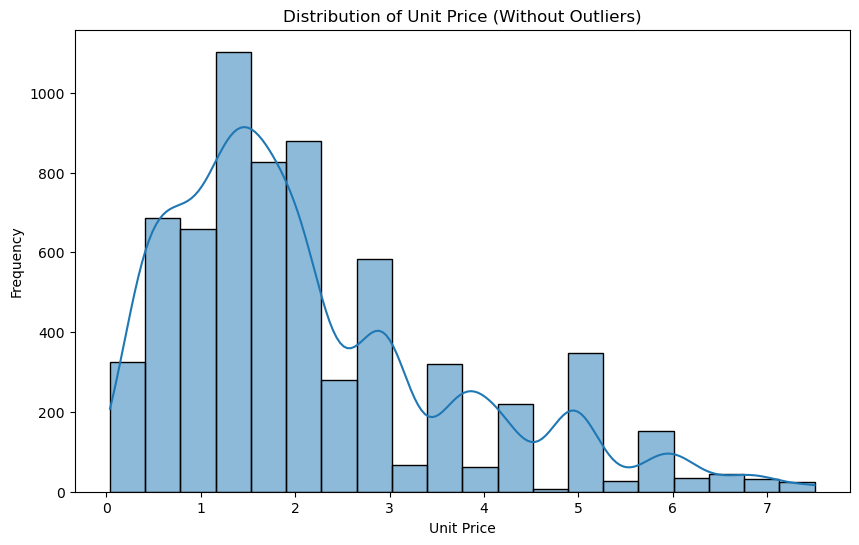

In [10]:
# Remove outliers using IQR for unit price 
Q1 = sample_data['UnitPrice'].quantile(0.25)
Q3 = sample_data['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1
filtered_data = sample_data[(sample_data['UnitPrice'] >= (Q1 - 1.5 * IQR)) & (sample_data['UnitPrice'] <= (Q3 + 1.5 * IQR))]

# Distribution of Unit Price after removing outliers
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['UnitPrice'], bins=20, kde=True)
plt.title('Distribution of Unit Price (Without Outliers)')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()


**Description:** This plot shows the distribution of unit prices. It helps us understand the pricing structure of the products sold.

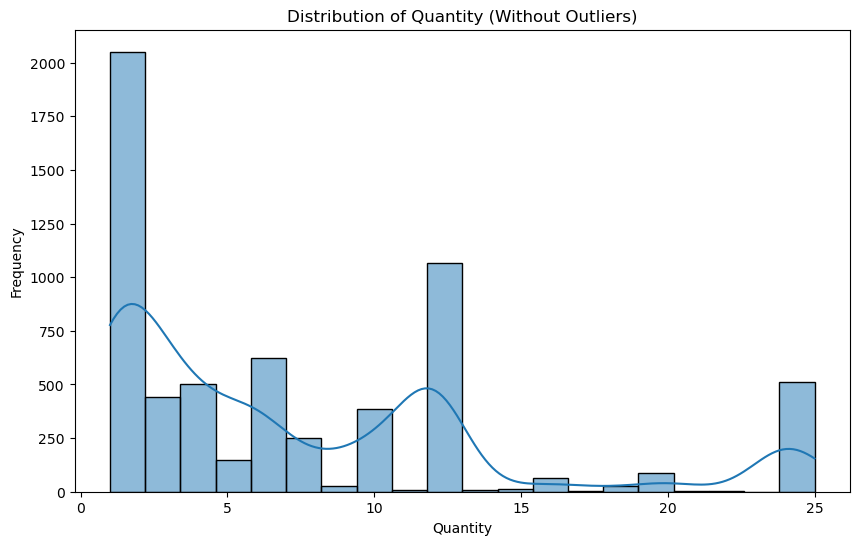

In [11]:
Q1 = sample_data['Quantity'].quantile(0.25)
Q3 = sample_data['Quantity'].quantile(0.75)
IQR = Q3 - Q1
filtered_data = filtered_data[(filtered_data['Quantity'] >= (Q1 - 1.5 * IQR)) & (filtered_data['Quantity'] <= (Q3 + 1.5 * IQR))]


# Distribution of Quantity after removing outliers
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['Quantity'], bins=20, kde=True)
plt.title('Distribution of Quantity (Without Outliers)')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

**Description:** This plot shows the distribution of quantities purchased per transaction. It helps us identify common purchase sizes.

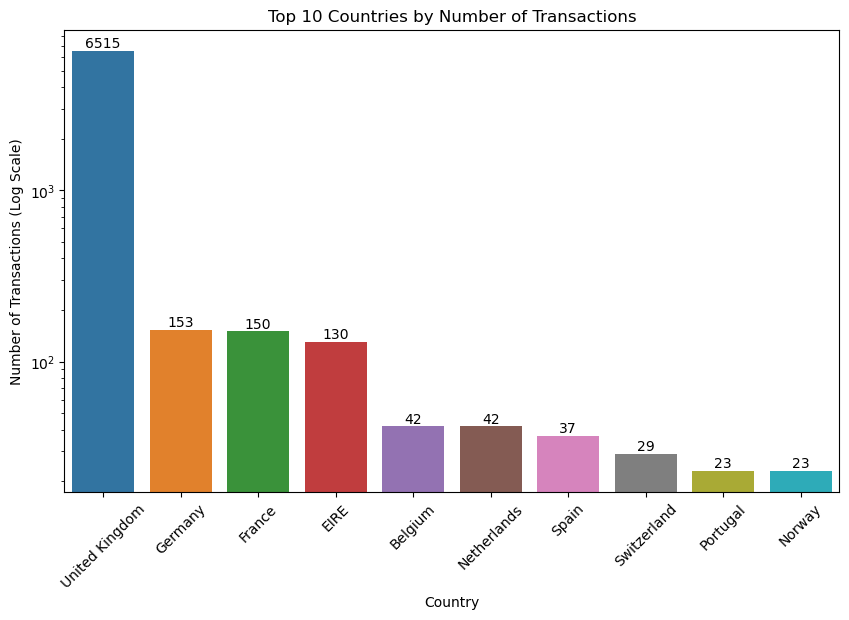

In [12]:
# top 10 countries by the number of transactions 
top_countries = sample_data['Country'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 10 Countries by Number of Transactions')
plt.xticks(rotation=45)
plt.ylabel('Number of Transactions (Log Scale)')
plt.yscale('log')  # Set the y-axis to log scale
# Annotate the bars with the counts
for i, count in enumerate(top_countries.values):
    plt.text(i, count, f'{count}', ha='center', va='bottom')
    
plt.show()

**Description:** This bar plot shows the top 10 countries by the number of transactions. It helps identify the key markets.

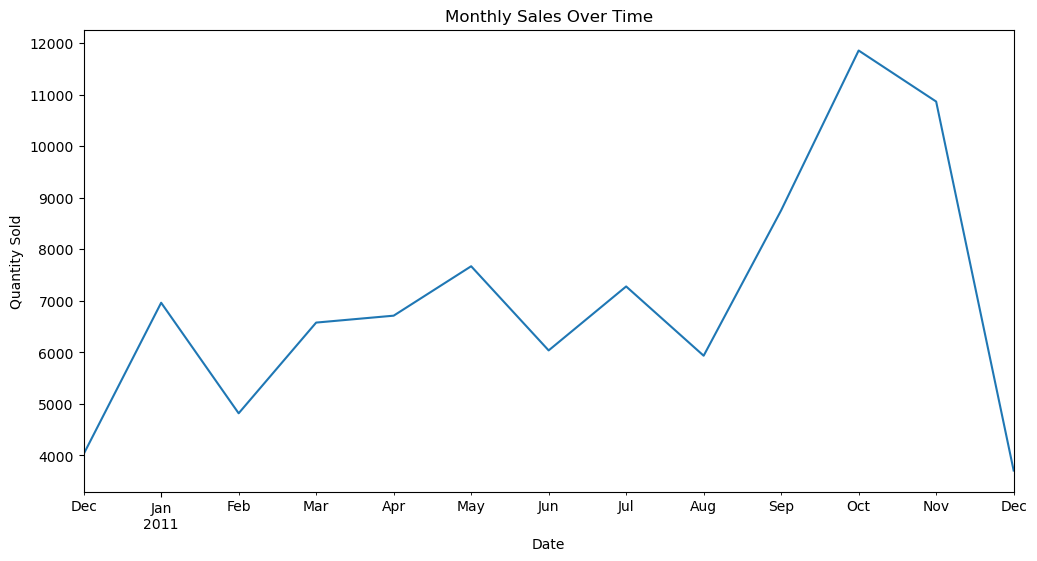

In [13]:
#time series analysis of sales over time 

sample_data.set_index('InvoiceDate', inplace=True) 
monthly_sales = sample_data['Quantity'].resample('M').sum()
plt.figure(figsize=(12,6))
monthly_sales.plot()
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.show()

**Description:** This is a time-series analysis of sales over time. According to this graph, October and November are the two months with the most sales. 

### Feature Engineering and Selection 

To create a new feature, we will create calculate total price as part of feature engineering requirement of this project. As total price measures the transaction value, it is going to be crucial for sales analysis and predicting revenue. 

Furthermore, we will select relevant features here. The original dataset contained information on InvoiceNo,	StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID and Country. As in this project, we are aiming to project future sales patterns, we will need information on quantity, unit price, total price and country of transaction. This is because these columns are directly linked to the purchasing trends of customers and provide isights on transaction pattern. So we will select those information as part of our relevant features. 


Other columns such as invoiceNo, stockCode, description, invoicedate, customerID, while important, do not give insights on identifying sales patterns and predicting future sales from the information these columns provide. Therefore, these columns will not be part of relevant features. 



In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Feature engineering: create 'TotalPrice' as a new feature
sample_data['TotalPrice'] = sample_data['Quantity'] * sample_data['UnitPrice']

# Encoding categorical variables
label_encoder = LabelEncoder()
sample_data['Country'] = label_encoder.fit_transform(sample_data['Country'])

# Selecting relevant features
features = sample_data[['UnitPrice', 'TotalPrice', 'Country']]
target = sample_data['Quantity']

# Standardizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


#### KMeans: Elbow Method

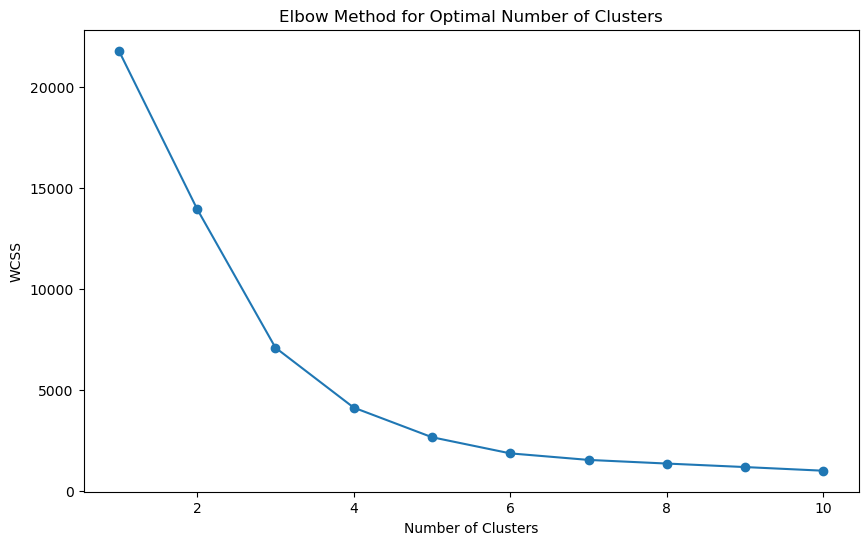

In [15]:
from sklearn.cluster import KMeans

# Elbow Method for Optimal Number of Clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=1)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Interpretation: The plot shows the WCSS for each number of clusters. The elbow point indicates the optimal number of clusters. According to this plot the optimal no of clusters is 4.

In [16]:
optimal_clusters = 4

# Applying KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=1)
sample_data['Cluster'] = kmeans.fit_predict(features_scaled)

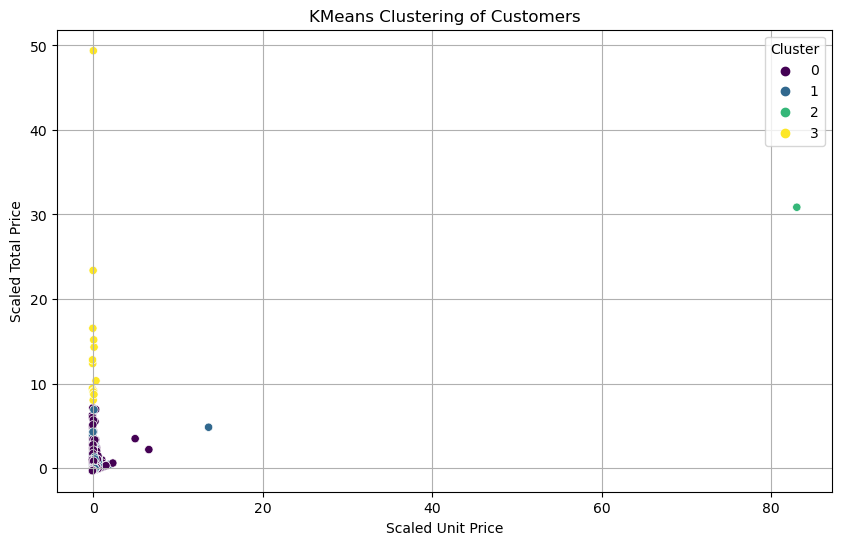

In [17]:
# Visualizing the clustering results

plt.figure(figsize=(10, 6))
sns.scatterplot(x=features_scaled[:, 0], y=features_scaled[:, 1], hue=sample_data['Cluster'], palette='viridis')
plt.title('KMeans Clustering of Customers')
plt.xlabel('Scaled Unit Price')
plt.ylabel('Scaled Total Price')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

**Description:** In the cluster analysis, we see that the purple cluster is at the lower end of unit price and total price. This suggests that customers in this cluster purchase smaller amounts of lower-priced items. The blue cluster has more scatters with higher unit prices and lower total prices. This customer segment purchases higher priced items but at lower amounts. Green cluster segments customers that purchase higher value items, sometimes in higher quantities. Yellow cluster segments customers that purchase lower unit price items but in higher quantities.  


## Model Building

### Model Building: Linear Regression

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=1)

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

# Predicting using Linear Regression Model
lr_predictions = lr_model.predict(x_test)


### Cross Validation and Hyper Parameter Tuning: Linear Regression

In [19]:
from sklearn.model_selection import cross_val_score 

# Cross-validation scores for Linear Regression
cv_scores = cross_val_score(lr_model, features_scaled, target, cv=5)
print("Cross-validation scores (Linear Regression):", cv_scores)

# Displaying mean and standard deviation of the cross-validation scores
print("Mean CV Score:", np.mean(cv_scores))
print("Standard Deviation of CV Scores:", np.std(cv_scores))


Cross-validation scores (Linear Regression): [ 0.27731576  0.38970256 -0.23308438  0.64390706  0.2738049 ]
Mean CV Score: 0.27032918082807555
Standard Deviation of CV Scores: 0.28541077057586717


### Model Evaluation: Linear Regression

Mean Squared Error (Linear Regression): 2642.000145213804
R^2 Score (Linear Regression): 0.24911929424879964


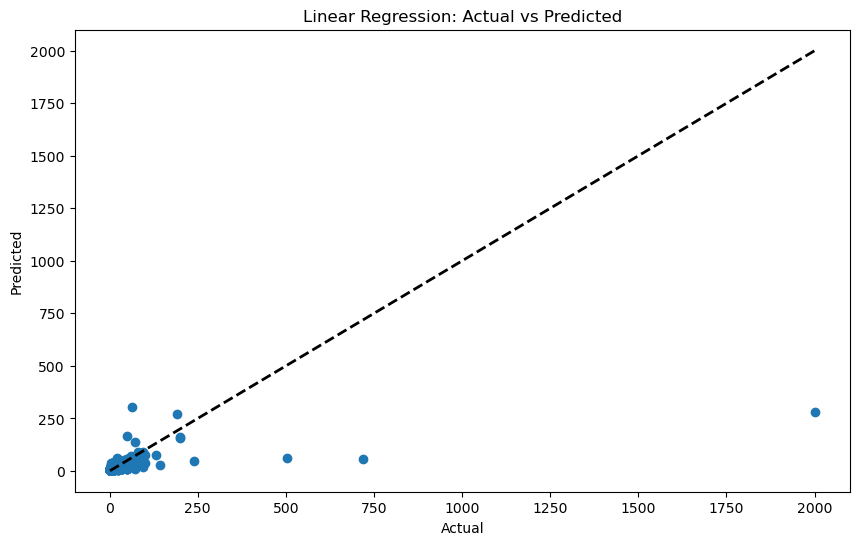

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Performance metrics for Linear Regression
mse = mean_squared_error(y_test, lr_predictions)
r2 = r2_score(y_test, lr_predictions)
print(f'Mean Squared Error (Linear Regression): {mse}')
print(f'R^2 Score (Linear Regression): {r2}')

# Plotting Linear Regression predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

**Description:** Here, the x-axis is the actual value of the target variable and the y-axis is the predicted value of the target variable. The dashed line represents the alignment between the actual and the predicted values. Here we see a lot of cases of misalignments and discrepencies between the two axes. This indicates that the linear regression model is not the best fit for this project.

### Model Building: Decision Tree Regressor

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Modeling
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=1)

# Initialize the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=1)

### Cross Validation and Hyper Parameter Tuning: Decision tree Regressor

In [22]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Best parameters
print("Best parameters found:", grid_search.best_params_)

# Train the model with the best parameters
best_dt_model = grid_search.best_estimator_
best_dt_model.fit(x_train, y_train)

# Predict using the trained model
dt_predictions = best_dt_model.predict(x_test)

Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


### Model Evaluation: Decision Tree Regressor

Mean Squared Error (Decision Tree): 523.3193511138617
R^2 Score (Decision Tree): 0.8512678341787763


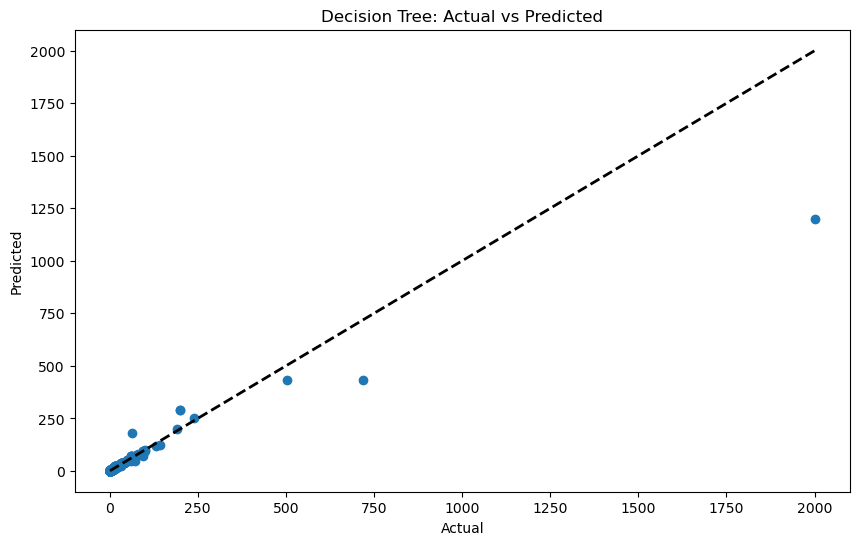

In [23]:
# Model evaluation
mse_dt = mean_squared_error(y_test, dt_predictions)
r2_dt = r2_score(y_test, dt_predictions)
print(f'Mean Squared Error (Decision Tree): {mse_dt}')
print(f'R^2 Score (Decision Tree): {r2_dt}')

# Plotting Decision Tree predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, dt_predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree: Actual vs Predicted')
plt.show()


**Description:** Here, the actual values and the predicted values align to the dashed line. This represents that the model is performing well as predicted values align well actual values. This indicates that the decision tree regressor model performs well with our project. This is further backed by the MSE and R^2 values

### Conclusion

In this project, I have tried linear regression model and the Decision Tree Regressor Machine Learning algorithm. Between the two, Decision Tree Algorithm has shown much better results and showed that the model is reliable for our project. The alignment between the predicted value and the actual value indicates that this model can predict and assist in several cases such as sales forecast, future demand, inventory management, promotional strategies, customer segmentation, etc. 

### Limitations 

More machine learning algorithms can be tried for this project, to identify the best machine learning algorithm for this project. 


### Future Work 

More feature engineering can be performed to make a more robust and accurate model for this project. 

Furthermore, we can apply deep learning processes such as neural network for a better algorithm. 